Your Name:  AAKIFAH RAHMAN
Roll Number: B120357CS

# 1. Linear Discriminant Analysis
In this part, we will do lda on a synthetic data set. That means we will generate the data ourselves and then fit a linear classifier to this data.

### Step1: Create data set

We are going to sample 500 points each from three 2d gaussian distributions. The means of the three gaussians are $\mu_1 = [a, b]^T$, $\mu_2 = [a+2, b+4]^T$ and $\mu_3 = [a+4, b]^T$ respectively, where **a** is *the last digit of your roll number* and **b** is *second last digit of your roll number*. <br>
Similarly the covariance matrices are $\Sigma_1 = \Sigma_2 = \Sigma_3 = I$ <br>
To generate points from 2d gaussians, we should first know how to generate random numbers.

##### How to generate random numbers?
use numpy random package.

In [36]:
%matplotlib inline
# code to sample a random number between 0 & 1
# Try running this multiple times by pressing Ctrl-Enter
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from numpy.linalg import solve

print (np.random.random())


0.05821525969914243


##### How to sample from a gaussian?
Use randn function to sample from a 1D gaussian with mean 0 and variance 1.

In [37]:
print (np.random.randn())

-0.6014170612073773


##### Let's sample 1000 points!
Use random.normal(mu, sigma, number of points). Let'us assume mean is 3.

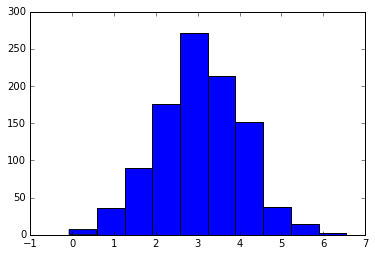

In [38]:
points = np.random.normal(3, 1, 1000)
# A histogram plot. It looks like a gaussian distribution centered around 3
plt.hist(points)
plt.show()

##### Generate samples from a 2D gaussian
Use random.multivariate_normal(mean, cov, 100) to generate 100 points from a multivariate gaussian


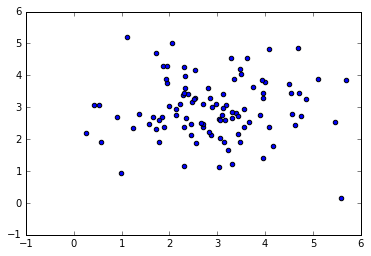

In [39]:
mean = np.array([3, 3])
cov = np.eye(2) # the identity matrix

points = np.random.multivariate_normal(mean, cov, 100)
# scatter plot with x axis as the first column of points and y axis as the second column
plt.scatter(points[:, 0], points[:, 1])
plt.show()

#### Sample from three different 2D gaussians
The means of the three gaussians should be $\mu_1 = [a, b]^T$, $\mu_2 = [a+2, b+4]^T$ and $\mu_3 = [a+4, b]^T$ respectively, where **a** is *the last digit of your roll number* and **b** is * the second last digit of your roll number*. <br>
Similarly the covariance matrices are $\Sigma_1 = \Sigma_2 = \Sigma_3 = I$ <br>

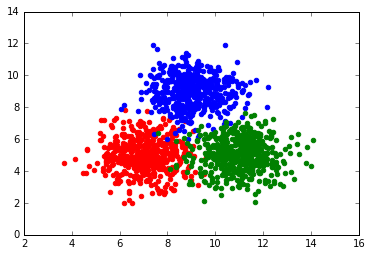

In [62]:
#covariance matrix for all 3 distributions
cov = np.eye(2)

d1 = np.random.multivariate_normal([7, 5], cov, 500)
d2 = np.random.multivariate_normal([9, 9], cov, 500)
d3 = np.random.multivariate_normal([11, 5], cov, 500)

data = np.vstack([d1, d2, d3])
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='blue')
plt.scatter(d3[:, 0], d3[:, 1], color='green')
plt.show()

### Step2: Estimate the Parameters
##### Estimate 3 means and a covariance matrix from data
We have assumed that $\Sigma = \sigma^2 I$. <br>
Convince yourself that the Maximum Likelihood Estimate for $\sigma^2$ is $\frac{1}{2n}\sum\limits_{i=1}^n (x_i-\mu)^T(x_i-\mu)$, where $n$ is the number of samples. <br>

Let's compute the maximum likelihood estimates for the three sets of data points (generated from 3 different gaussians) separately, denote them as $\hat\sigma_1^2$, $\hat\sigma_2^2$ and $\hat\sigma_3^2$ and then take the combined estimate as the averae of the three estimates.

In [63]:
#MLE of mean of the 3 distributions
m1 = np.mean(d1, axis = 0)
m2 = np.mean(d2, axis = 0)
m3 = np.mean(d3, axis = 0)

print(m1)
print(m2)
print(m3)

#MLE of covariance of the 3 distributions

t1 = d1 - m1
s1 = np.trace(np.dot(np.transpose(t1), t1)) / (2*500)

t2 = d2 - m2
s2 = np.trace(np.dot(np.transpose(t2), t2)) / (2*500)

t3 = d3 - m3
s3 = np.trace(np.dot(np.transpose(t3), t3)) / (2*500)

print(s1)
print(s2)
print(s3)

#Combined estimate - the average of the 3 estimates
s = (s1 + s2 + s3)/3
print(s)

[ 7.03174713  4.97716525]
[ 9.04989517  8.99935726]
[ 10.97393867   5.04580297]
1.00052339977
0.979926033575
1.00157478941
0.994008074254


### Step3: Draw the Decision Boundaries
Refer your notes/textbook to convince yourself that in the particular case where all the normal distributions have the same prior and the same covariance matrix of the form $\sigma^2I$, the discriminant functions are given by $$g_i(x) = \mu_i^Tx - \frac{1}{2}\mu_i^T\mu_i$$Find the point at which $g_1(x) = g_2(x) = g_3(x)$ <br>
Draw the three decision boundaries by solving $g_1(x) = g_2(x)$, $g_1(x) =  g_3(x)$ and $g_2(x) = g_3(x)$


Common point :
[ 8.97660013  6.51873107]


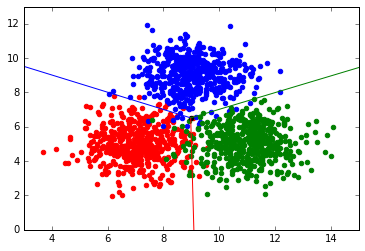

In [68]:
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='blue')
plt.scatter(d3[:, 0], d3[:, 1], color='green')

#Solving g1(x)=g2(x) to get the common point of intersection
a = np.array([[m1.item(0)-m2.item(0), m1.item(1)-m2.item(1)],
              [m1.item(0)-m3.item(0), m1.item(1)-m3.item(1)]])
b = np.array([0.5 * ((m1.item(0) * m1.item(0)) + (m1.item(1) * m1.item(1)) - 
                     (m2.item(0) * m2.item(0)) - (m2.item(1) * m2.item(1))),
              0.5 * ((m1.item(0) * m1.item(0)) + (m1.item(1) * m1.item(1)) - 
                     (m3.item(0) * m3.item(0)) - (m3.item(1) * m3.item(1)))])
sol = np.linalg.solve(a, b)
print('Common point :')
print (sol)
plt.scatter(sol.item(0), sol.item(1), color='black')

#Plot the decision boundary g1(x)=g2(x)
a = m1.item(0)-m2.item(0)
b = m1.item(1)-m2.item(1)
c = 0.5 * ((m1.item(0) * m1.item(0)) + (m1.item(1) * m1.item(1)) - 
           (m2.item(0) * m2.item(0)) - (m2.item(1) * m2.item(1)))
x = np.linspace(2, sol.item(0), 20)
y = (c - (a*x)) /b
plt.plot(x, y, color='blue')   

#Plot the decision boundary g1(x)=g3(x)
a = m1.item(0)-m3.item(0)
b = m1.item(1)-m3.item(1)
c = 0.5 * ((m1.item(0) * m1.item(0)) + (m1.item(1) * m1.item(1)) -
           (m3.item(0) * m3.item(0)) - (m3.item(1) * m3.item(1)))
x = np.linspace(sol.item(0), 9.2, 10)
y = (c - (a*x)) /b
plt.plot(x, y, color='red')  

#Plot the decision boundary g3(x)=g2(x)
a = m3.item(0)-m2.item(0)
b = m3.item(1)-m2.item(1)
c = 0.5 * ((m3.item(0) * m3.item(0)) + (m3.item(1) * m3.item(1)) -
           (m2.item(0) * m2.item(0)) - (m2.item(1) * m2.item(1)))
x = np.linspace(sol.item(0), 15, 20)
y = (c - (a*x)) /b
plt.plot(x, y, color='green')   

plt.axis([3,15,0,13])
plt.show()

# 2. Parzen Window

##### Gaussian kernel smoothing
The kernel density model is given by $$p(x) = \frac{1}{N} \sum_{i=1}^N \frac{1}{(2\pi h^2)^{D/2}} exp\left(\frac{- (x-x_i)^T(x-x_i)}{2h^2}\right) \ $$
where *D* is the dimension (which is 2 here), *h* is the standard deviation parameter we have to set, and *N* is the total number of samples.

##### Density estimation in 1 dimension
Let's generate data from a mixture of two 1D gaussians as follows. Toss a fair coin, if the outcome is heads, sample a data point from the first gaussian, otherwise sample from the second gaussian. The two gaussians have a mean 2 and 4 and a standard deviation of 1.

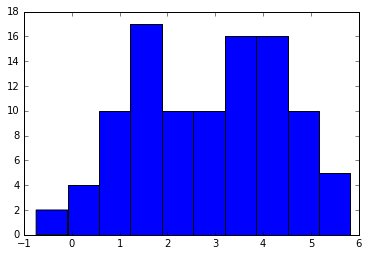

In [43]:
# Generate 100 points
points = np.array([])

for i in range(100): # sample 100 points
    if np.random.rand() > 0.5:
        points = np.append(points, np.random.normal(2,1))
    else:
        points = np.append(points, np.random.normal(4,1))

plt.hist(points)
plt.show()

###### Parzen window estimation
Our x ranges approximately from -2 to 10. The pdf is given by $p(x) = \frac{1}{N} \sum\limits_{i=1}^N \frac{1}{(2\pi h^2)^{1/2}} exp\left(\frac{- (x-x_i)^2}{2h^2}\right) \ $ for every value of x. In order to plot the estimated density, we compute the above pdf for a range of x, starting from -2 till 10, incrementing x by 0.02.
Choose different values for the smoothing parameter *h* to get the best density estimate. (Try h=0.08, 0.1, 0.15 etc.) What value of h gives the bimodal distribution?

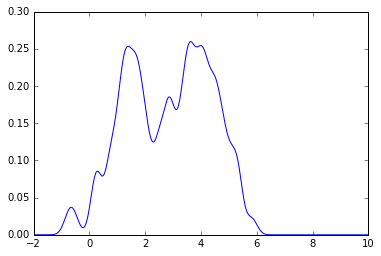

In [44]:
#h value may be altered and tested for
h = 0.19
X = np.arange(-2, 10, 0.02)

# for each point in x, we have compute its pdf
Y = np.array([])
N = len(points)

for x in X:
    t = 0
    for xi in points:
        t += np.exp(-(x-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
plt.show()
    
#h value of 0.19 almost gives the bi-modal distribution

##### Density estimation in 2 Dimension
Similarly do density estimation for the above data set which we sampled from 3 2d gaussians. 

**Note:** It will be computationally expensive to calculate the density for all the points in the 2D plane. So do density estimation for points in the square [c-2, c+2]x[d-2, d+2] where (c,d) denotes the coordinates of the meeting point of the three discriminant lines in the Linear Discriminant Analysis we have done above.


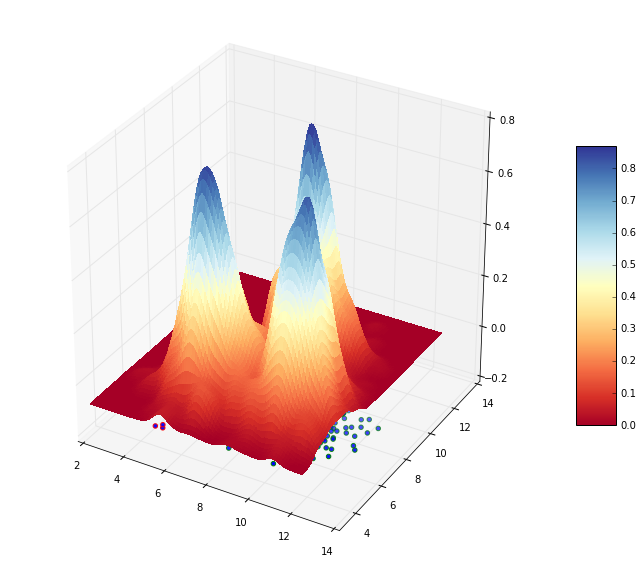

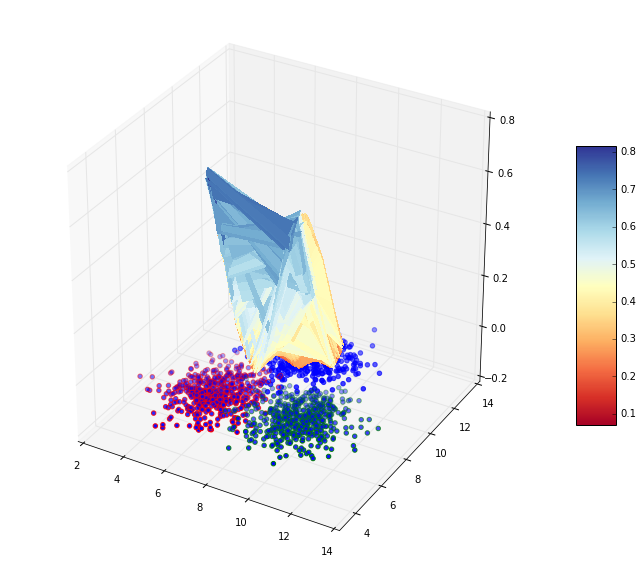

In [69]:
from mpl_toolkits.mplot3d import Axes3D

#h value may be altered and tested for
h = 0.3

#The probability density function
def z(a, b): 
    x = np.array([a,b]) 
    t = 0
    for xi in data:
        t += np.exp(-1*np.dot(np.transpose(x-xi), x-xi)/(2*h*h))
    
    y = (t/(2*np.pi*h*h*N))
    return y
   
# Plot 1 - to visualize the 3 2d gaussians
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(d1[:, 0], d1[:, 1], color='red')
ax.scatter(d2[:, 0], d2[:, 1], color='blue')
ax.scatter(d3[:, 0], d3[:, 1], color='green')

# Range of values for x and y axis (helps visualize the 3 2d gaussians)
X = np.linspace(3, 13, 100)
Y = np.linspace(2, 13, 100)
X,Y = np.meshgrid(X,Y)
Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(z(i, j))
    
Z = np.asarray(Z).reshape(100,100)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.RdYlBu, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.RdYlBu)

ax.set_xlim([2,14])
ax.set_ylim([3,14])
ax.set_zlim([-0.2,0.8])
plt.show()

#Plot 2 - Plotting the density with x and y axiz values as mentioned in the question
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(d1[:, 0], d1[:, 1], color='red')
ax.scatter(d2[:, 0], d2[:, 1], color='blue')
ax.scatter(d3[:, 0], d3[:, 1], color='green')

# Range of values for x and y axis 
X = [np.random.uniform(sol.item(0)-2, sol.item(0)+2) for i in range(100)]
Y = [np.random.uniform(sol.item(1)-2, sol.item(1)+2) for i in range(100)]
X,Y = np.meshgrid(X,Y)
Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(z(i, j))
    
Z = np.asarray(Z).reshape(100,100)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.RdYlBu, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.RdYlBu)

ax.set_xlim([2,14])
ax.set_ylim([3,14])
ax.set_zlim([-0.2,0.8])
plt.show()
